## Evolutionary Dynamics

# Exercises 1

In [1]:
from functools import partial

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
sns.set_style("darkgrid")
sns.set_palette("Paired")

## Problem 2: Logistic difference equation

In [3]:
def plot_discrete_evolution(func, start_point, num_steps=100):
    xs = [start_point]
    
    for _ in range(num_steps):
        xs.append(func(xs[-1]))
    
    plt.plot(xs)

In [4]:
def plot_pointcare_section(func, start_point, num_steps=100):
    xs = [start_point]
    ys = []
    
    for _ in range(num_steps):
        ys.append(xs[-1])
        xs.append(func(xs[-1]))
        
    plt.plot(xs[1:], ys, marker='.', markersize=5)

In [5]:
def f(x_t, r):
    return r*x_t*(1 - x_t)

### (c)

**r = 0.5**

In [6]:
f_05 = partial(f, r=0.5)

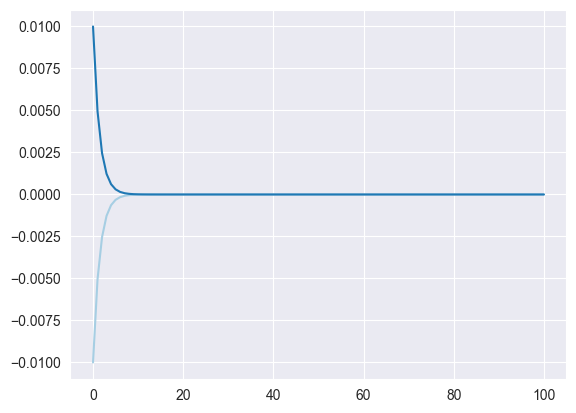

In [7]:
plot_discrete_evolution(f_05, -0.01)
plot_discrete_evolution(f_05, 0.01)

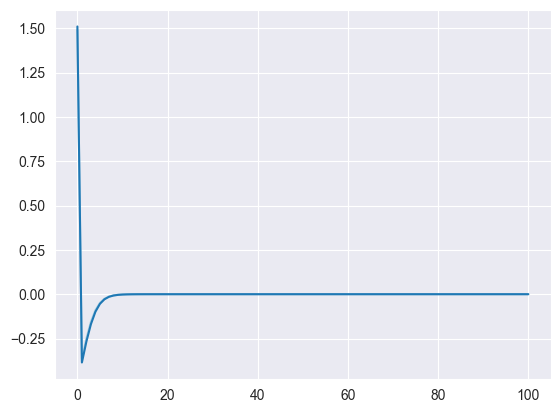

In [8]:
plot_discrete_evolution(f_05, 1.49)
plot_discrete_evolution(f_05, 1.51)

**r = 1.5**

In [9]:
f_15 = partial(f, r=1.5)

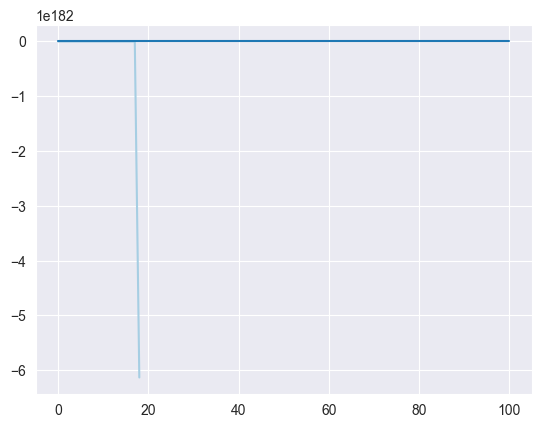

In [10]:
plot_discrete_evolution(f_15, -0.01)
plot_discrete_evolution(f_15, 0.01)

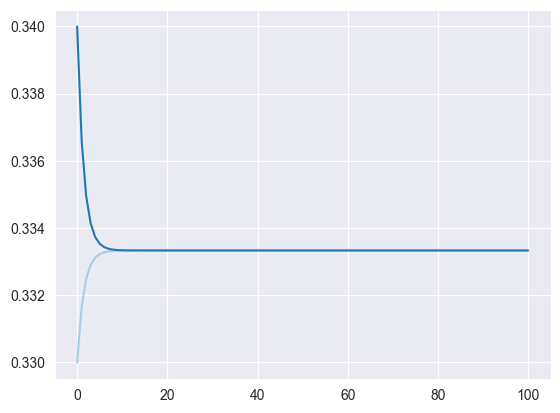

In [11]:
plot_discrete_evolution(f_15, 0.33)
plot_discrete_evolution(f_15, 0.34)

**r = 2.5**

In [12]:
f_25 = partial(f, r=2.5)

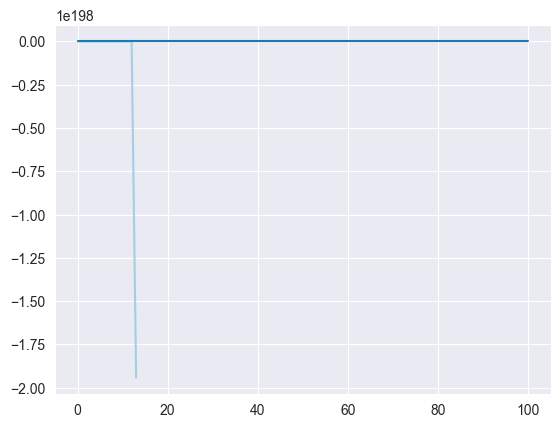

In [13]:
plot_discrete_evolution(f_25, -0.01)
plot_discrete_evolution(f_25, 0.01)

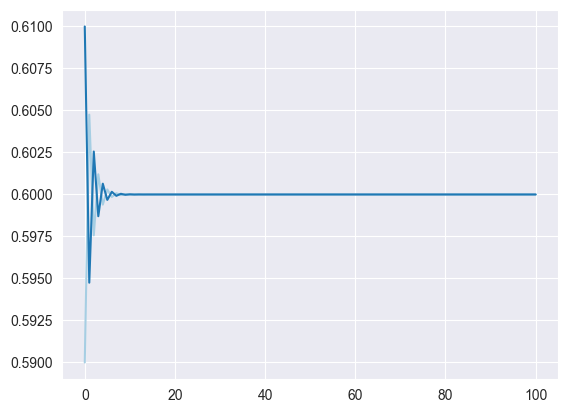

In [14]:
plot_discrete_evolution(f_25, 0.59)
plot_discrete_evolution(f_25, 0.61)

### (d)

In [15]:
f_35 = partial(f, r=3.5)

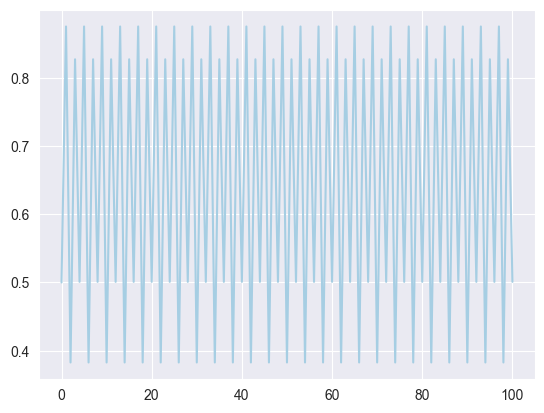

In [16]:
plot_discrete_evolution(f_35, 0.5)

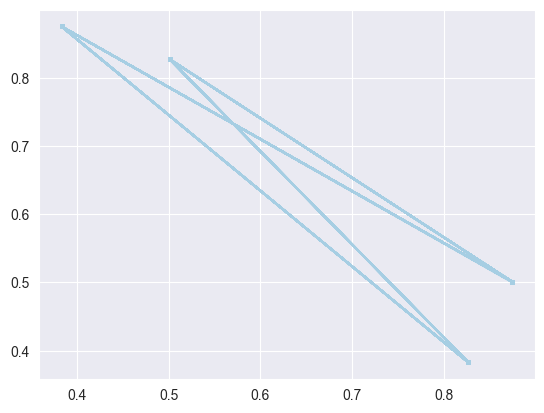

In [17]:
plot_pointcare_section(f_35, 0.5)

### (e)

In [18]:
f_39 = partial(f, r=3.9)

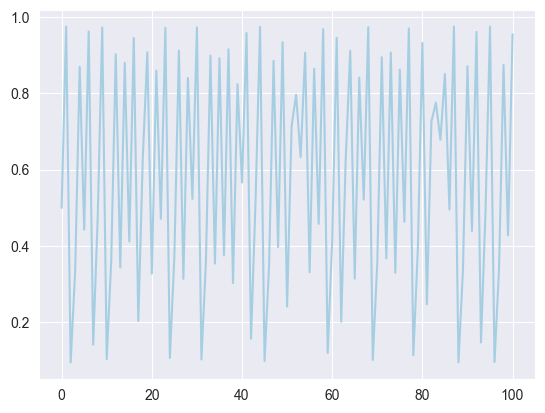

In [19]:
plot_discrete_evolution(f_39, 0.5)

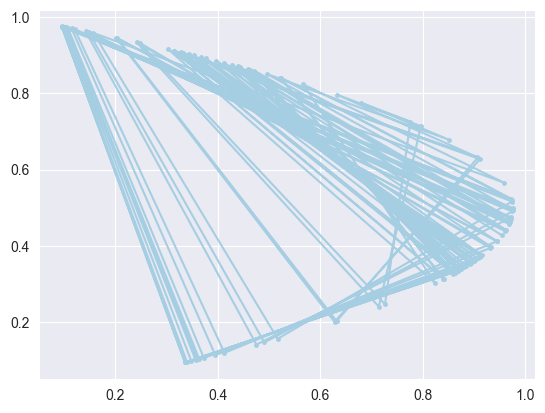

In [20]:
plot_pointcare_section(f_39, 0.5)

## Problem 3: Logistic growth in continuous time

In [128]:
def plot_continuous_evolution(func, start_time=0, end_time=7, num_steps=100):
    ts = np.linspace(start_time, end_time, num_steps)
    xs = list(map(func, ts))
    plt.plot(ts, xs, linewidth=4, label="analytical")
    plt.legend(loc="upper right")
    plt.ylim(-1.5, 2)

In [129]:
def plot_approximate_continuous_evolution(derivative, initial_value, start_time=0, end_time=7, num_steps=100):
    result = solve_ivp(
        fun=derivative, 
        t_span=(start_time, end_time), 
        y0=[initial_value], 
        rtol=1e-10
    )
    plt.plot(result.t, result.y.flatten(), linestyle='dashed', label="numerical")
    plt.legend(loc="upper right")
    plt.ylim(-1.5, 2)

In [130]:
def dx(t, x, l, K):
    return l*x*(1 - x/K)

In [131]:
def x(t, l, K, x0):
    return (K * x0 * np.exp(l*t)) / (K + x0 * (np.exp(l*t) - 1))

### (c)

**K=1, l=0.3**

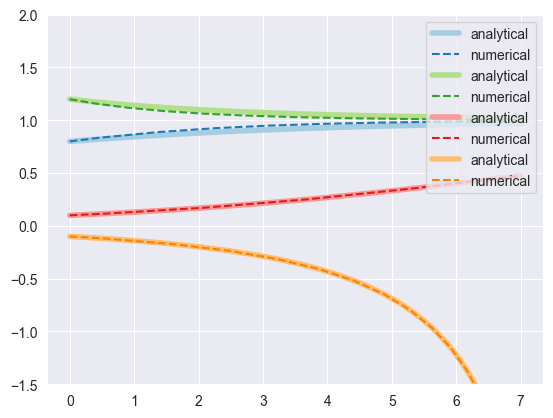

In [132]:
plot_continuous_evolution(partial(x, l=0.3, K=1, x0=0.8))
plot_approximate_continuous_evolution(partial(dx, l=0.5, K=1), 0.8)

plot_continuous_evolution(partial(x, l=0.3, K=1, x0=1.2))
plot_approximate_continuous_evolution(partial(dx, l=0.5, K=1), 1.2)

plot_continuous_evolution(partial(x, l=0.3, K=1, x0=0.1))
plot_approximate_continuous_evolution(partial(dx, l=0.3, K=1), 0.1)
plt.legend(loc="upper right")

plot_continuous_evolution(partial(x, l=0.3, K=1, x0=-0.1))
plot_approximate_continuous_evolution(partial(dx, l=0.3, K=1), -0.1)
plt.legend(loc="upper right")

**K=1, l=-0.2**

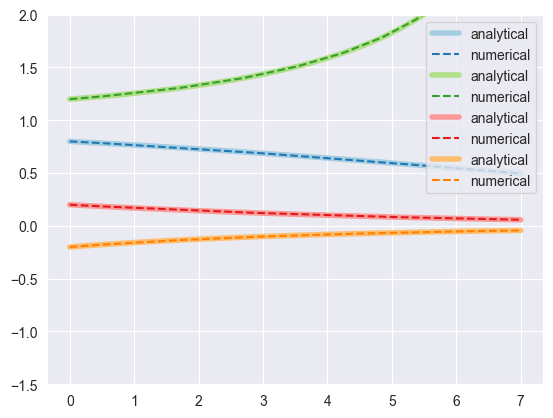

In [133]:
plot_continuous_evolution(partial(x, l=-0.2, K=1, x0=0.8))
plot_approximate_continuous_evolution(partial(dx, l=-0.2, K=1), 0.8)

plot_continuous_evolution(partial(x, l=-0.2, K=1, x0=1.2))
plot_approximate_continuous_evolution(partial(dx, l=-0.2, K=1), 1.2)

plot_continuous_evolution(partial(x, l=-0.2, K=1, x0=0.2))
plot_approximate_continuous_evolution(partial(dx, l=-0.2, K=1), 0.2)

plot_continuous_evolution(partial(x, l=-0.2, K=1, x0=-0.2))
plot_approximate_continuous_evolution(partial(dx, l=-0.2, K=1), -0.2)